### Abel transform 

Let us consider the normalized phase space $x-p_x$ and a 2D matched density distribution $\rho$.
For the linear case, a matched distribution is rotation invariant, that is, in the $J,\mu$ variables, we can write $\rho(r=\sqrt{2 J},\phi)=\rho(r)$. Here we use the $r$-notation instead of the $J$-notation to stay compatible with the [Abel transform](https://en.wikipedia.org/wiki/Abel_transform)'s standard form.  

We consider for $\rho$ the following normalization:
\begin{equation}
\int_0^\infty  \int_0^{2\pi} \rho( r ) \ r\ dr\ d\phi = 2\pi \int_0^\infty  \rho( r ) \ r\ dr =1.
\end{equation}

By defining a linear radial density $\rho_r(r)=2\pi \rho(r) \ r$, we have

\begin{equation}
\int_0^\infty \rho_r( r ) dr= 1
\end{equation}

Where

- the $\rho(r)$ is the 2D density to be Abel-transformed (see Example 3).
- the $\rho_r(r)$ is the 1D density to be used in the numerical experiment we will perform (see Example 2). In fact is more convenient for our purpose to populate a random vector starting from a 1D density than a 2D one.

### Example 1
Given two normal distributed variables $x-p_x$, compute numerically the distribution the $\rho_r(r)$ and $\rho_r(J)$ (where we preferred the simplicity of the notation and we indulged its rigor).


In [19]:
from madxp import luminosity as lumi
from matplotlib import pylab as plt
import numpy as np
from scipy import special
import matplotlib
from scipy.stats import norm
def gauss(x,sigma):
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x)**2/2/sigma**2)

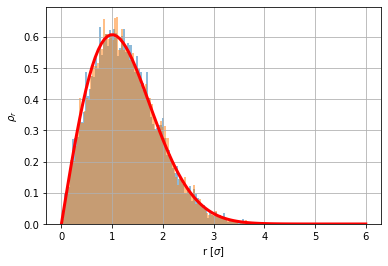

In [20]:
# Showing that rho_r(r) distributes like a Chi-distribution
N=10000
x=np.random.randn(N)
y=np.random.randn(N)

plt.hist(np.sqrt(x**2+y**2),100,density=True,alpha=.5); # Chi-distribution of type 2 or Rayleigh-distribution

from scipy.stats import chi
rho_r = chi.rvs(2, size=N)
plt.hist(rho_r,100,density=True,alpha=.5)

r=np.linspace(0,6,100)
plt.plot(r, chi.pdf(r,2),'r',lw=3)
plt.grid(True)
plt.xlabel('r [$\sigma$]')
plt.ylabel('$\\rho_r$');

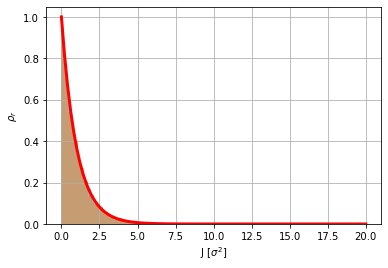

In [21]:
# Showing that rho_r(J) distributes like a chi2-distribution
N=10000
x=np.random.randn(N)
y=np.random.randn(N)

plt.hist((x**2+y**2)/2,100,density=True,alpha=.5); # chi2-squared distribution of type 2

from scipy.stats import chi2
rho_r = chi2.rvs(2, size=N)/2
plt.hist(rho_r,100,density=True,alpha=.5)

J=np.linspace(0,20,100)
plt.plot(J, 2*chi2.pdf(J*2,2),'r',lw=3)
plt.grid(True)
plt.xlabel('J [$\sigma^2$]')
plt.ylabel('$\\rho_r$');

### Example 2

Starting from two 1D distributions 

- rho_r (Rayleigh-distributed) and 
- rho_phi(uniform distributed in [0-2$\pi$])

verify that x is normal distributed.

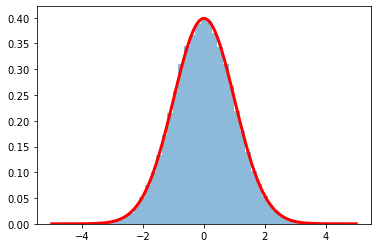

In [23]:
from scipy.stats import chi
N=100000
rho_r = chi.rvs(2, size=N)
rho_phi=np.random.rand(N)*2*np.pi
x=rho_r*np.cos(rho_phi)
plt.hist(x,50,density=True,alpha=.5 );
x=np.linspace(-5,5,100)
plt.plot(x, gauss(x,1),'r',lw=3)

### Example 3

From rho_r (chi-distributed), compute the rho and verify that its Abel-transform is normal distributed.

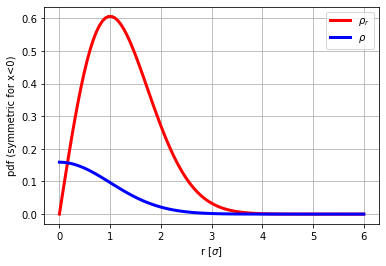

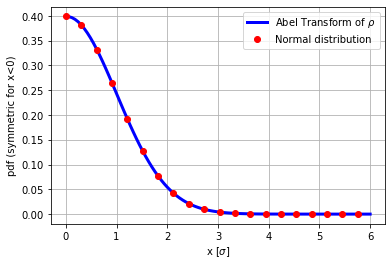

In [24]:
from scipy.stats import chi


r=np.linspace(0.00001,6,100)
rho_r=chi.pdf(r,2)
plt.plot(r, rho_r,'r',lw=3,label='$\\rho_r$')

#find rho
rho=rho_r/2/np.pi/r
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
aux=direct_transform(rho, dr=np.diff(r)[0], direction="forward", correction=True)

plt.plot(r,rho,'b',lw=3,label='$\\rho$')
plt.grid(True)
plt.ylabel('pdf (symmetric for x<0)')
plt.xlabel('r [$\sigma$]')
plt.legend(loc='best')


plt.figure()
plt.plot(r,aux,'b',label='Abel Transform of $\\rho$', lw=3)

plt.plot(r[0::5],gauss(r[0::5],1),'or',label='Normal distribution', lw=3)

plt.ylabel('pdf (symmetric for x<0)')
plt.xlabel('x [$\sigma$]')
plt.legend(loc='best')
plt.grid(True)


## Example 4
Let us consider a double-Gaussian beam $x$-profile. Indeed the Abel transform is linear, this is therefore is a sanity check.

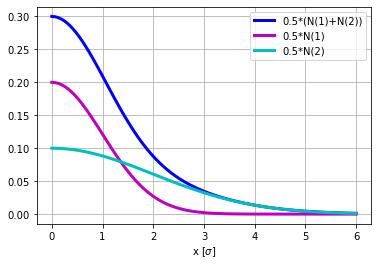

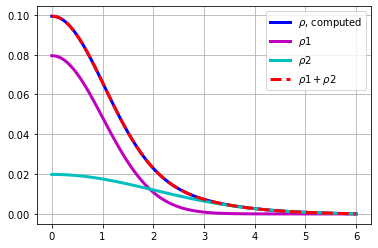

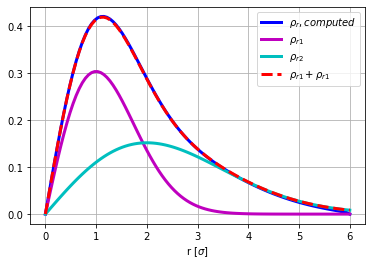

In [59]:
from scipy.stats import chi

r=np.linspace(0,6,100)

from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical

rho=direct_transform(.5*gauss(r,1)+.5*gauss(r,2), dr=np.diff(r)[0], direction="inverse", correction=True)
rho1=direct_transform(.5*gauss(r,1), dr=np.diff(r)[0], direction="inverse", correction=True)
rho2=direct_transform(.5*gauss(r,2), dr=np.diff(r)[0], direction="inverse", correction=True)


plt.figure()
plt.plot(r,.5*gauss(r,1)+.5*gauss(r,2),'b',lw=3,label='0.5*(N(1)+N(2))')
plt.plot(r,.5*gauss(r,1),'m',lw=3,label='0.5*N(1)')
plt.plot(r,.5*gauss(r,2),'c',lw=3,label='0.5*N(2)')
plt.grid(True)
plt.xlabel('x [$\sigma$]')
plt.legend(loc='best')

plt.figure()
plt.plot(r,rho,'b',lw=3,label='$\\rho$, computed')
plt.plot(r,rho1,'m',lw=3,label='$\\rho1$')
plt.plot(r,rho2,'c',lw=3,label='$\\rho2$')
plt.plot(r,rho1+rho2,'--r',lw=3,label='$\\rho1 +\\rho2$')
plt.legend(loc='best')
plt.grid(True)


rho_r=rho*2*np.pi*r

rho_r1=0.5*chi.pdf(r,2,scale=1)
rho_r2=0.5*chi.pdf(r,2,scale=2)

plt.figure()
plt.plot(r,rho_r,'b',lw=3,label='$\\rho_r, computed$')
plt.plot(r,rho_r1,'m',lw=3,label='$\\rho_{r1}$' )
plt.plot(r,rho_r2,'c',lw=3,label='$\\rho_{r2}$' )
plt.plot(r,rho_r1+rho_r2,'r--',lw=3,label='$\\rho_{r1}+\\rho_{r1}$' )
plt.grid(True)
plt.xlabel('r [$\sigma$]')
plt.legend(loc='best');

In [60]:
pwd

'/eos/home-s/sterbini/MD_ANALYSIS/2020/doubleGaussian'